In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
yob1880 = pd.read_table('names_sets\yob1880.txt', delimiter=',', names=['name', 'sex', 'number'])
yob1880

,name,sex,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [9]:
yob1880.groupby('sex')['number'].sum()

sex
F     90993
M    110493
Name: number, dtype: int64

In [10]:
years = range(1880, 1910)
pieces = []
for year in years:
    df = pd.read_table('names_sets\yob%d.txt'%year, sep = ',', names = [ 'name' , 'sex', 'number'])
    df['year'] = year
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)
data

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
88940,Wilfrid,M,5,1909
88941,Wilma,M,5,1909
88942,Winthrop,M,5,1909
88943,Winton,M,5,1909


In [11]:
# Суммы родившихся младенцев по полу для каждого года
nums_df = pd.DataFrame(columns=['F', 'M'], index=np.arange(1880, 2011))
y = 1880
for item in pieces:
    nums_df['F'][y] = item.groupby('sex')['number'].sum()['F']
    nums_df['M'][y] = item.groupby('sex')['number'].sum()['M']
    y += 1
nums_df

,F,M
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,NaN,NaN
2007,NaN,NaN
2008,NaN,NaN
2009,NaN,NaN


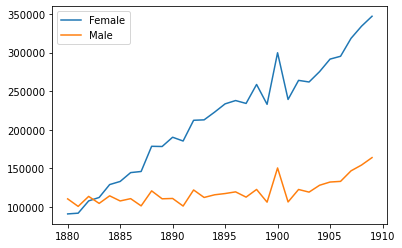

In [12]:
Ox = nums_df.index
Oyf = nums_df['F'].values
Oym = nums_df['M'].values

f_y = plt.plot(Ox, Oyf, label='Female')
m_y = plt.plot(Ox, Oym, label='Male')

plt.legend()

plt.show()

In [13]:
# Сумма всех младенцев
amount = data['number'].sum()
amount

10056093

In [21]:
data['proportion'] = data['number'] / sum(data['number'])
data

,name,sex,number,year,proportion
0,Mary,F,7065,1880,7.025591e-04
1,Anna,F,2604,1880,2.589475e-04
2,Emma,F,2003,1880,1.991827e-04
3,Elizabeth,F,1939,1880,1.928184e-04
4,Minnie,F,1746,1880,1.736261e-04
...,...,...,...,...,...
88940,Wilfrid,M,5,1909,4.972110e-07
88941,Wilma,M,5,1909,4.972110e-07
88942,Winthrop,M,5,1909,4.972110e-07
88943,Winton,M,5,1909,4.972110e-07


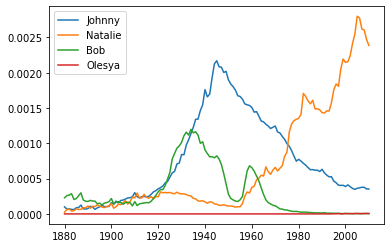

In [22]:
years = []
for i in range(1880, 2011):
    years.append(i)
Johnny = []
Natalie = []
Bob = []
Olesya = []
s = []
for i in range(1880, 2011):
    local_df = pd.read_table('names_sets\yob%d.txt'%i, sep=',', names=['name', 'sex', 'number'])
    summ_count = sum(local_df['number'])
    J_count= sum(local_df[local_df['name'] == 'Johnny']['number'])
    Johnny.append(J_count / summ_count)
    N_count= sum(local_df[local_df['name'] == 'Natalie']['number'])
    Natalie.append(N_count / summ_count)
    B_count= sum(local_df[local_df['name'] == 'Bob']['number'])
    Bob.append(B_count / summ_count)
    V_count= sum(local_df[local_df['name'] == 'Vlad']['number'])
    Olesya.append(V_count / summ_count)


plt.plot(years, Johnny, label='Johnny')
plt.plot(years, Natalie, label='Natalie')
plt.plot(years, Bob, label='Bob')
plt.plot(years, Olesya, label='Olesya')
plt.legend()

In [23]:
max_count = []
for i in range(1880, 2011):
    loc = pd.read_table('names_sets\yob%d.txt'%i, sep=',', names=['name', 'sex', 'number'])
    sort = loc.sort_values(by='number', ascending=False)
    max_count.append(sort['number'].iloc[0])
print('year : max')
for i in range(131):
    print(years[i], ':', max_count[i])

year : max
1880 : 9655
1881 : 8769
1882 : 9557
1883 : 8894
1884 : 9387
1885 : 9128
1886 : 9891
1887 : 9888
1888 : 11754
1889 : 11649
1890 : 12078
1891 : 11704
1892 : 13174
1893 : 12784
1894 : 13151
1895 : 13446
1896 : 13811
1897 : 13412
1898 : 14406
1899 : 13172
1900 : 16710
1901 : 13137
1902 : 14485
1903 : 14275
1904 : 14962
1905 : 16067
1906 : 16371
1907 : 17579
1908 : 18664
1909 : 19256
1910 : 22840
1911 : 24385
1912 : 32295
1913 : 36631
1914 : 45341
1915 : 58184
1916 : 61428
1917 : 64270
1918 : 67375
1919 : 65839
1920 : 70974
1921 : 73980
1922 : 72156
1923 : 71636
1924 : 73505
1925 : 70594
1926 : 67830
1927 : 70594
1928 : 66867
1929 : 63502
1930 : 64110
1931 : 60492
1932 : 59859
1933 : 55477
1934 : 56898
1935 : 56501
1936 : 58462
1937 : 61799
1938 : 62246
1939 : 59623
1940 : 62454
1941 : 66696
1942 : 77155
1943 : 80231
1944 : 76935
1945 : 74475
1946 : 87382
1947 : 99651
1948 : 96185
1949 : 90952
1950 : 86094
1951 : 87046
1952 : 87060
1953 : 86081
1954 : 88462
1955 : 88285
1956 : 90